In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf

from test_tfrecord_reader import TFRecordReader

In [3]:
test_dataset = TFRecordReader('../test_data/test_records').test_dataset()

model = tf.keras.models.load_model(
    "D:/PROJECTS/internship/saved model/unet_2_model.h5", compile=False)

In [4]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()


In [5]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]


In [6]:
def show_predictions(dataset, num=3):
    for image, mask in dataset.take(num):
        pred_mask = model.predict(image)
        display([image[0], mask[0], create_mask(pred_mask)])

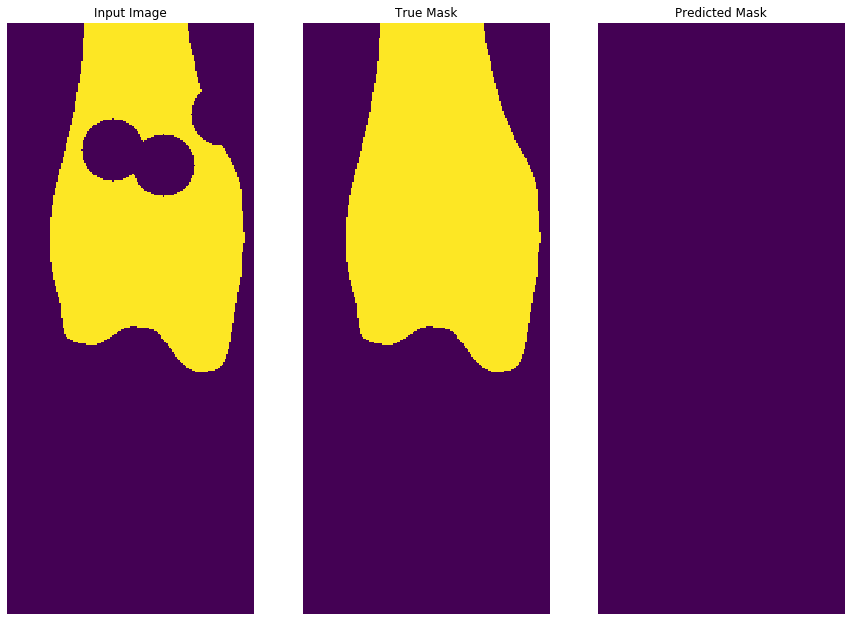

In [7]:
show_predictions(test_dataset, 3)
